In [1]:
import torch
import numpy as np
from dataloader import ANNEDataset
from dataloader import ANNEDataset_transition
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import random
import sys
import json
sys.path.append(".")
sys.path.append("/scratch/alexhemo/ANNE_dl/")
from preprocessing.main import main, read_strings_from_json,  get_edf_files
                                                                
DATA_DIR = "/scratch/alexhemo/data/"

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.empty_cache()
# device = "cpu"



In [ ]:
fives = ['/home/alexhemo/scratch/data/22-12-07-22_29_59.C4359.L3786.515/22-12-07-22_29_59.C4359.L3786.515-features.edf', '/home/alexhemo/scratch/data/21-08-18-21_37_37.C1425.L1205.303/21-08-18-21_37_37.C1425.L1205.303-features.edf', '/home/alexhemo/scratch/data/23-06-20-21_18_51.C4384.L4041.618/23-06-20-21_18_51.C4384.L4041.618-features.edf', '/home/alexhemo/scratch/data/23-04-24-20_54_48.C4181.L3766.582/23-04-24-20_54_48.C4181.L3766.582-features.edf', '/home/alexhemo/scratch/data/22-03-30-23_13_48.C4151.L3562.375/22-03-30-23_13_48.C4151.L3562.375-features.edf', '/home/alexhemo/scratch/data/21-01-25-21_33_14.C1425.L1205.242/21-01-25-21_33_14.C1425.L1205.242-features.edf', '/home/alexhemo/scratch/data/21-12-14-22_27_58.C3882.L3562.342/21-12-14-22_27_58.C3882.L3562.342-features.edf', '/home/alexhemo/scratch/data/20-11-24-21_39_36.C1459.L1198.223/20-11-24-21_39_36.C1459.L1198.223-features.edf', '/home/alexhemo/scratch/data/21-07-07-22_01_55.C1390.L1215.293/21-07-07-22_01_55.C1390.L1215.293-features.edf', '/home/alexhemo/scratch/data/23-09-26-19_33_55.C4408.L4087.674/23-09-26-19_33_55.C4408.L4087.674-features.edf', '/home/alexhemo/scratch/data/21-07-06-21_42_48.C1390.L1215.292/21-07-06-21_42_48.C1390.L1215.292-features.edf', '/home/alexhemo/scratch/data/23-11-07-19_26_16.C4415.L4084.701/23-11-07-19_26_16.C4415.L4084.701-features.edf', '/home/alexhemo/scratch/data/19-12-17-20_37_24.C823.L775.1/19-12-17-20_37_24.C823.L775.1-features.edf', '/home/alexhemo/scratch/data/21-08-17-21_26_01.C1425.L1205.302/21-08-17-21_26_01.C1425.L1205.302-features.edf', '/home/alexhemo/scratch/data/23-07-04-20_48_04.C4181.L3766.624/23-07-04-20_48_04.C4181.L3766.624-features.edf']
sixes = ['/home/alexhemo/scratch/data/23-09-12-19_38_05.C4408.L4087.666/23-09-12-19_38_05.C4408.L4087.666-features.edf', '/home/alexhemo/scratch/data/22-06-14-22_05_48.C4179.L3806.412/22-06-14-22_05_48.C4179.L3806.412-features.edf', '/home/alexhemo/scratch/data/22-07-20-21_20_47.C4179.L3806.432/22-07-20-21_20_47.C4179.L3806.432-features.edf']
validation_list = fives + sixes

In [2]:
def get_transitions(t):
    t0 = np.copy(t)
    t1 = np.copy(t)
    t2 = np.copy(t)

    t1 = np.concatenate((np.array([0]), t1))
    t2 = np.concatenate((t2, np.array([0])))

    t3 = t2 - t1
    t4 = t3[1:]

    t0 = np.where(t4 != 0, 3, t0) 
    t0 = np.where(t0 != 3, 0, t0)
    t0 = np.where(t0 == 3, 1, t0)
    
    return t0

In [3]:
predict_loaders = []
#train_list = get_edf_files("/home/alexhemo/scratch/data/")
#validation_list = random.sample(train_list, 20)
validation_list = read_strings_from_json("./validation.json")
#for file in read_strings_from_json("/scratch/alexhemo/ANNE_dl/models/validation.json"):
for file in validation_list:
    X, X_freq, X_scl, t = main(file)
    print(t)
    t = t[0]
    # t = np.where(t == 1, 0, t)
    # t = np.where(t == 2, 1, t)
    dataset = ANNEDataset_transition(X, X_freq, X_scl, np.array([t]), np.array([get_transitions(t)]), device)
    size = len(X)

    predict_loaders.append(DataLoader(dataset=dataset, batch_size=size))


# test_dataset = ANNEDataset(X_test, X_freq_test, X_scl_test, t_test, device)
# test_dataloader = DataLoader(dataset=test_dataset, batch_size=test_dataset.__len__())

Extracting EDF parameters from /home/alexhemo/scratch/data/21-03-15-21_16_58.C1442.L1215.258/21-03-15-21_16_58.C1442.L1215.258-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
21-03-15-21_16_58.C1442.L1215.258
age: 24.0219028062971; sex: Female
[[0 0 0 ... 0 0 0]]
Extracting EDF parameters from /home/alexhemo/scratch/data/21-05-19-21_46_54.C1425.L1205.279/21-05-19-21_46_54.C1425.L1205.279-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/scratch/alexhemo/ANNE_dl/preprocessing/main.py:117: RuntimeWarning: Physical range is not defined in following channels:
PLM_events
  data = mne.io.read_raw_edf(path)


21-05-19-21_46_54.C1425.L1205.279
age: 66.8856947296372; sex: Male
[[0 0 0 ... 0 0 0]]
Extracting EDF parameters from /home/alexhemo/scratch/data/20-08-12-21_24_46.C1425.L1362.180/20-08-12-21_24_46.C1425.L1362.180-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
20-08-12-21_24_46.C1425.L1362.180
age: 21.0403832991102; sex: Female
[[0 0 0 ... 0 0 0]]
Extracting EDF parameters from /home/alexhemo/scratch/data/23-07-05-21_06_58.C4384.L4041.625/23-07-05-21_06_58.C4384.L4041.625-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/scratch/alexhemo/ANNE_dl/preprocessing/main.py:117: RuntimeWarning: Physical range is not defined in following channels:
resp_events
  data = mne.io.read_raw_edf(path)


23-07-05-21_06_58.C4384.L4041.625
age: 75.5318275154004; sex: Male
[[0 0 0 ... 0 0 0]]
Extracting EDF parameters from /home/alexhemo/scratch/data/21-03-03-21_54_30.C1425.L1205.254/21-03-03-21_54_30.C1425.L1205.254-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
21-03-03-21_54_30.C1425.L1205.254
age: 49.7413871777322; sex: Female
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 

/scratch/alexhemo/ANNE_dl/preprocessing/main.py:117: RuntimeWarning: Physical range is not defined in following channels:
PLM_events
  data = mne.io.read_raw_edf(path)


22-05-16-21_48_00.C4179.L3806.395
age: 72.3285420944559; sex: Female
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 0 0
  1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0
  0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

/scratch/alexhemo/ANNE_dl/preprocessing/main.py:117: RuntimeWarning: Physical range is not defined in following channels:
PLM_events
  data = mne.io.read_raw_edf(path)


22-07-19-21_27_55.C4179.L3806.431
age: 63.9945242984257; sex: Male
[[0 0 0 ... 0 0 0]]
Extracting EDF parameters from /home/alexhemo/scratch/data/21-11-03-21_20_01.C3884.L3562.330/21-11-03-21_20_01.C3884.L3562.330-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


/scratch/alexhemo/ANNE_dl/preprocessing/main.py:117: RuntimeWarning: Physical range is not defined in following channels:
resp_events, PLM_events, SpO2_events
  data = mne.io.read_raw_edf(path)


21-11-03-21_20_01.C3884.L3562.330
age: 35.0773442847365; sex: Female
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1]]
Extracting EDF parameters from /home/alexhemo/scratch/data/22-05-30-21_37_30.C4179.L3806.402/22-05-30-21_37_30.C4179.L3806.402-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
22-05-30-21_37_30

/scratch/alexhemo/ANNE_dl/preprocessing/main.py:117: RuntimeWarning: Physical range is not defined in following channels:
PLM_events
  data = mne.io.read_raw_edf(path)


20-11-24-21_39_36.C1459.L1198.223
age: 22.2588409765001; sex: Female
[[0 0 0 ... 0 0 0]]
Extracting EDF parameters from /home/alexhemo/scratch/data/21-02-18-21_48_01.C1425.L1205.251/21-02-18-21_48_01.C1425.L1205.251-features.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
21-02-18-21_48_01.C1425.L1205.251
age: 57.6373488478211; sex: Female
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1
  1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 

/scratch/alexhemo/ANNE_dl/preprocessing/main.py:117: RuntimeWarning: Physical range is not defined in following channels:
SpO2_events
  data = mne.io.read_raw_edf(path)


22-08-22-21_09_14.C4368.L3805.454
age: 48.2162902121834; sex: Male
[[0 0 0 ... 0 0 0]]


In [4]:
targets = []
for train_loader in predict_loaders:
    for i, (inputs, inputs_freq, inputs_scl, labels, transition_labels, lengths) in enumerate(train_loader):
        print(labels.cpu())
        targets.append(labels.cpu())

tensor([0, 0, 0,  ..., 0, 0, 0])
tensor([0, 0, 0,  ..., 0, 0, 0])
tensor([0, 0, 0,  ..., 0, 0, 0])
tensor([0, 0, 0,  ..., 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

tensor([0, 0, 0,  ..., 0, 0, 0])
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       

In [5]:
from scipy.special import softmax

def predict(model, loader, device, return_softmax=False, transition_model=False):
    # Change model to 'eval' mode (BN uses moving mean/var).
    model.eval()

    all_preds = []
    all_labels = []
    all_softmaxes = []

    for i, (inputs, inputs_freq, inputs_scl, labels, transition_labels, lengths) in enumerate(loader):
        with torch.no_grad():
            inputs = inputs.to(device)
            labels = labels.to(device)
            inputs_freq = inputs_freq.to(device)
            inputs_scl = inputs_scl.to(device)
            # inputs = inputs.view(inputs.size(0), -1)
            pred = model(inputs, inputs_freq, inputs_scl)
        if transition_model:
            pred = pred[:, :3]
        if return_softmax:
            pred = pred.cpu().detach().numpy()
            pred_softmax = softmax(pred, axis=1)
            all_softmaxes.append(pred_softmax)
        else:
            pred = torch.max(pred.data, 1)[1]
            pred_np = pred.cpu().detach().numpy()
            all_preds.append(pred_np)

        labels_np = labels.cpu().detach().numpy()
        all_labels.append(labels_np)
    if return_softmax:
        return np.concatenate(all_labels), np.concatenate(all_softmaxes)
    else:
        return np.concatenate(all_labels), np.concatenate(all_preds)

In [ ]:
from scipy.special import softmax

def predict_transition(model, loader, device, return_softmax=False):
    # Change model to 'eval' mode (BN uses moving mean/var).
    model.eval()

    all_preds = []
    all_labels = []
    all_softmaxes = []

    for i, (inputs, inputs_freq, inputs_scl, labels, transition_labels, lengths) in enumerate(loader):
        with torch.no_grad():
            inputs = inputs.to(device)
            labels = labels.to(device)
            inputs_freq = inputs_freq.to(device)
            inputs_scl = inputs_scl.to(device)
            # inputs = inputs.view(inputs.size(0), -1)
            pred = model(inputs, inputs_freq, inputs_scl)
        pred = pred[:, :3]
        if return_softmax:
            pred = pred.cpu().detach().numpy()
            pred_softmax = softmax(pred, axis=1)
            all_softmaxes.append(pred_softmax)
        else:
            pred = torch.max(pred.data, 1)[1]
            pred_np = pred.cpu().detach().numpy()
            all_preds.append(pred_np)

        labels_np = labels.cpu().detach().numpy()
        all_labels.append(labels_np)
    if return_softmax:
        return np.concatenate(all_labels), np.concatenate(all_softmaxes)
    else:
        return np.concatenate(all_labels), np.concatenate(all_preds)

In [6]:
def ensemble(loader, base_model=None, wake_model=None, nrem_model=None, rem_model=None, no_ppg_model=None,alpha=1):
    
    assert (base_model is not None or 
            no_ppg_model is not None or 
            (wake_model is not None and nrem_model is not None and rem_model is not None))
    
    softmaxes = []
    
    #if base_model:
    #    labels, base_softmaxes = predict(base_model, loader, device, return_softmax=True)
    #    softmaxes.append(base_softmaxes)
    #                     # / 33.1 ** alpha + base_softmaxes/ 58.7 ** alpha + base_softmaxes / 8.2 ** alpha)
    
    if base_model:
        labels, base_softmaxes = predict(base_model, loader, device, return_softmax=True, transition_model=True)
        softmaxes.append(base_softmaxes)
                         # / 33.1 ** alpha + base_softmaxes/ 58.7 ** alpha + base_softmaxes / 8.2 ** alpha)
    #if transition_model:
    #    labels, base_softmaxes = predict(base_model, loader, device, return_softmax=True, transition_model=True)
    #    softmaxes.append(base_softmaxes)
    if wake_model:
        labels, wake_softmaxes = predict(wake_model, loader, device, return_softmax=True)
        wake_softmaxes_3_class = np.column_stack((wake_softmaxes, wake_softmaxes[:, 1]))
        wake_softmaxes_3_class = wake_softmaxes_3_class / np.sum(wake_softmaxes_3_class, axis=1, keepdims=True)
        softmaxes.append(wake_softmaxes_3_class)
        # softmaxes.append(wake_softmaxes_3_class / 33.1 ** alpha)
    
    if nrem_model:
        labels, nrem_softmaxes = predict(nrem_model, loader, device, return_softmax=True)
        nrem_softmaxes_3_class = np.column_stack((nrem_softmaxes, nrem_softmaxes[:, 0]))
        nrem_softmaxes_3_class = nrem_softmaxes_3_class / np.sum(nrem_softmaxes_3_class, axis=1, keepdims=True)
        #softmaxes.append(nrem_softmaxes_3_class)
        #softmaxes.append(nrem_softmaxes_3_class / 58.7 ** alpha)
        softmaxes.append(nrem_softmaxes_3_class / 4.0)
        
    if rem_model:
        labels, rem_softmaxes = predict(rem_model, loader, device, return_softmax=True)
        rem_softmaxes_3_class = np.column_stack((rem_softmaxes[:, 0], rem_softmaxes))
        rem_softmaxes_3_class = rem_softmaxes_3_class / np.sum(rem_softmaxes_3_class, axis=1, keepdims=True)
        softmaxes.append(rem_softmaxes_3_class)
        # softmaxes.append(rem_softmaxes_3_class / 8.2 ** alpha)
    
    # if no_ppg_model:
    #     labels, no_ppg_softmaxes = predict(no_ppg_model, loader, device, return_softmax=True)
    #     softmaxes.append(no_ppg_softmaxes / 100)
    
    ensembled_softmaxes = np.sum(softmaxes, axis=0)
    ensembled_softmaxes = ensembled_softmaxes / np.sum(ensembled_softmaxes, axis=1, keepdims=True)
    
    return labels, np.argmax(ensembled_softmaxes, axis=1)

In [7]:
#base_model = torch.jit.load("checkpoints/es_20240114-014745.pt")

#transition_model = torch.jit.load("checkpoints/es_20240215-135254.pt")
#transition_model = torch.jit.load("checkpoints/es_20240215-214933.pt")
transition_model = torch.jit.load("checkpoints/transition_morenrem.pt")

wake_model = torch.jit.load("checkpoints/wake-2-class.pt")
rem_model = torch.jit.load("checkpoints/rem-2-class.pt")
nrem_model = torch.jit.load("checkpoints/nrem-2-class.pt")

time_only_model = torch.jit.load("checkpoints/time_only.pt")

#no_ppg_model = torch.jit.load("checkpoints/es_20240113-233831.pt")

In [ ]:
ensemble(predict_loaders[0], base_model=transition_model, nrem_model = nrem_model
         # , wake_model=wake_model, rem_model=rem_model, nrem_model=nrem_model
         )

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
<module 'numpy' from '/scratch/alexhemo/jupyternew/lib/python3.10/site-packages/numpy/__init__.py'> 99.79166666666667


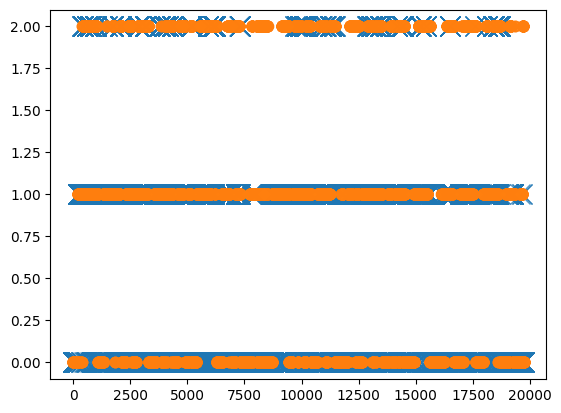

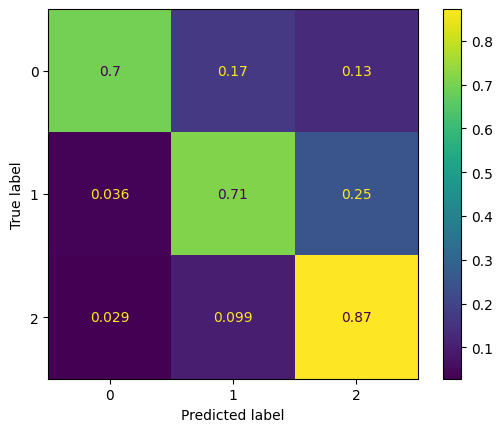

In [8]:
labels1 = None
preds1 = None

for test_dataloader in predict_loaders:
    labels, preds = ensemble(test_dataloader, 
                             base_model=transition_model, 
                            #wake_model=wake_model, 
                            # rem_model=rem_model, 
                              #nrem_model=nrem_model,
                             alpha=1)
    
    # labels, preds = predict(wake_model, test_dataloader, device=device)
    if labels1 is None:
        labels1, preds1 = labels, preds
    else:
        labels1 = np.concatenate((labels1, labels), axis=0)
        preds1 = np.concatenate((preds1, preds), axis=0)

print(labels1)
print(preds1)
conf_mat = confusion_matrix(labels1, preds1, normalize="true")

print(np, sum(labels1) * 30 / 60 / 60)

plt.plot(labels1, marker="x", linestyle="", alpha=0.75, markersize=15)
plt.plot(preds1, marker=".", linestyle="", alpha=0.75, markersize=15)
plt.show()

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
disp.plot()
plt.show()


In [9]:
def calculate_metrics(predictions, labels):
    # Create confusion matrix
    conf_matrix = confusion_matrix(labels, predictions)

    # Calculate metrics for each class
    num_classes = conf_matrix.shape[0]

    sensitivity = np.zeros(num_classes)
    specificity = np.zeros(num_classes)
    precision = np.zeros(num_classes)
    class_accuracy = np.zeros(num_classes)

    for i in range(num_classes):
        # True Positives for class i
        TP = conf_matrix[i, i]

        # False Positives for class i
        FP = conf_matrix[:, i].sum() - TP

        # False Negatives for class i
        FN = conf_matrix[i, :].sum() - TP

        # True Negatives for class i
        TN = conf_matrix.sum() - (TP + FP + FN)

        # Sensitivity (Recall) for class i
        sensitivity[i] = TP / (TP + FN) if TP + FN != 0 else 0.0

        # Specificity for class i
        specificity[i] = TN / (TN + FP) if TN + FP != 0 else 0.0

        # Precision for class i
        precision[i] = TP / (TP + FP) if TP + FP != 0 else 0.0

        # Per-class accuracy
        class_accuracy[i] = TP / (TP + FN) if TP + FN != 0 else 0.0

    # Overall accuracy
    accuracy = np.trace(conf_matrix) / np.sum(conf_matrix)

    return sensitivity, specificity, precision, class_accuracy, accuracy

In [10]:
sensitivity, specificity, precision, class_accuracy, accuracy  = calculate_metrics(preds1, labels1)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)
print("Class Accuracy:", class_accuracy)
print("Overall Accuracy:", accuracy)

Sensitivity: [0.69691987 0.71209005 0.87207602]
Specificity: [0.96530593 0.83929082 0.80688378]
Precision: [0.94528695 0.79600726 0.25174087]
Class Accuracy: [0.69691987 0.71209005 0.87207602]
Overall Accuracy: 0.7161682716675114


In [11]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
def calculate_macro_f1(predictions, labels, average='macro'):
    # Calculate precision and recall for each class
    precision = precision_score(labels, predictions, average=None, zero_division=0)
    recall = recall_score(labels, predictions, average=None, zero_division=0)

    # Calculate F1 score for each class
    f1 = 2 * (precision * recall) / (precision + recall)

    # Calculate macro F1 score
    print(f1)
    macro_f1 = np.mean(f1)

    return macro_f1

In [12]:
calculate_macro_f1(preds1, labels1)

[0.80232191 0.75171389 0.3906992 ]


0.6482450015545317

In [13]:
from sklearn.metrics import f1_score
f1_score(labels1, preds1, average="macro")

0.6482450015545317